In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Data Wrangling

## Data Gathering

- Dataset source: https://www.kaggle.com/toramky/automobile-dataset

### Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

In [3]:
path="imports-85.csv"
df=pd.read_csv(path, na_values=["?"])

In [4]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df.columns = headers

In [7]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0


In [8]:
df.to_csv('automobile_version_1.csv')

## Data Assessing

In [9]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [11]:
missing_data = df.isnull()

In [12]:
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

## Quality:
- 'normalized-losses' column contains about 40 missing values (nan values), replace them with average of the existing values of the column
- 'num-of-doors' column contains about 2 missing values, replace them with most frequent value in column
- 'bore' column contains about 4 missing values, replace them with average of the existing values of the column
- 'stroke' column contains about 4 missing values, replace them with average of the existing values of the column
- 'horsepower' column contains about 2 missing values, replace them with average of the existing values of the column
- 'peak-rpm' column contains about 2 missing values, replace them with average of the existing values of the column
- "fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system" columns are object type, change them to category type
- "normalized-losses","horsepower","peak-rpm" are float type, change them to int type
- 'price' column contains about 4 missing values, replace them with average of the existing values of the column

## Data Cleaning

### Define
- 'normalized-losses' column contains about 40 missing values (nan values), replace them with average of the existing values of the column
- 'bore' column contains about 4 missing values, replace them with average of the existing values of the column
- 'stroke' column contains about 4 missing values, replace them with average of the existing values of the column
- 'horsepower' column contains about 2 missing values, replace them with average of the existing values of the column
- 'peak-rpm' column contains about 2 missing values, replace them with average of the existing values of the column
- 'price' column contains about 4 missing values, replace them with average of the existing values of the column

### Code

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='mean')

df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = \
imputer.fit_transform(df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']])

In [15]:
# # df.iloc[:,np.r_[1,18:20,21:23]].fillna(df.iloc[:,np.r_[1,18:20,21:23]].mean(), inplace=True)
# # df.iloc[:,np.r_[1,18:20,21:23]]
# df.loc[:,('normalized-losses','bore','stroke','horsepower','peak-rpm')].\
# fillna(df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].mean(), inplace=True)

# df.loc[:,('normalized-losses','bore','stroke','horsepower','peak-rpm')]

### Test

In [16]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
price                0
dtype: int64

### Define
- 'num-of-doors' column contains about 2 missing values, replace them with most frequent value in column

### Code

In [17]:
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,114
two,88


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(strategy='most_frequent')

df['num-of-doors']=imputer.fit_transform(df[['num-of-doors']])

### Test

In [20]:
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,116
two,88


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

### Define
- "fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system" columns are object type, change them to category type
- "normalized-losses","horsepower","peak-rpm" are float type, change them to int type

### Code

In [22]:
df[["fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","engine-type","num-of-cylinders",
    "fuel-system"]]= df[["fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","engine-type",
                         "num-of-cylinders","fuel-system"]].astype('category')

In [23]:
df[["normalized-losses","horsepower","peak-rpm"]]=df[["normalized-losses","horsepower","peak-rpm"]].astype('int')

### Test

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          204 non-null    int64   
 1   normalized-losses  204 non-null    int32   
 2   make               204 non-null    object  
 3   fuel-type          204 non-null    category
 4   aspiration         204 non-null    category
 5   num-of-doors       204 non-null    category
 6   body-style         204 non-null    category
 7   drive-wheels       204 non-null    category
 8   engine-location    204 non-null    category
 9   wheel-base         204 non-null    float64 
 10  length             204 non-null    float64 
 11  width              204 non-null    float64 
 12  height             204 non-null    float64 
 13  curb-weight        204 non-null    int64   
 14  engine-type        204 non-null    category
 15  num-of-cylinders   204 non-null    category
 16  engine-s

In [25]:
df.to_csv('automobile_version_2.csv')

# Data Preprocessing

In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.25830,10.148137,104.220588,5125.980392,25.240196,30.769608,13205.6900
std,1.239035,31.758944,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.31175,3.981000,39.613594,478.071114,6.551513,6.898337,7888.0996
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.0000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.11000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.7500
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.0000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.41000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.0000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.17000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.0000


### Feature Engineering
- transform 'city-mpg'(mile per gallon) to 'city-l/100km'(liter per 100km)
- transform 'highway-mpg'(mile per gallon) to 'highway-l/100km'(liter per 100km)
- transform 'horsepower' from continous values to discrete categorical values

### Define
- transform 'city-mpg'(mile per gallon) to 'city-l/100km'(liter per 100km) (liter per 100km) = 235/(mile per gallon)
- transform 'highway-mpg'(mile per gallon) to 'highway-l/100km'(liter per 100km)

### Code

In [27]:
df['city-l/100km']=235/df['city-mpg']
df['highway-l/100km']=235/df['highway-mpg']

### Test

In [28]:
df[['city-mpg','city-l/100km','highway-mpg','highway-l/100km']].head(3)

,city-mpg,city-l/100km,highway-mpg,highway-l/100km
0,21,11.190476,27,8.703704
1,19,12.368421,26,9.038462
2,24,9.791667,30,7.833333


### Define
- transform 'horsepower' from continous values to discrete categorical values (high,medium,low)

### Code

In [29]:
required_bins = np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
required_labels = ['Low','Medium','High']

In [30]:
df['horsepower-category'] = pd.cut(df['horsepower'],bins=required_bins,labels=required_labels, include_lowest=True)

In [31]:
required_bins

array([ 48., 128., 208., 288.])

### Test

In [32]:
df['horsepower-category'].value_counts()

Low       162
Medium     40
High        2
Name: horsepower-category, dtype: int64

In [33]:
df[['horsepower','horsepower-category']].head(2)

,horsepower,horsepower-category
0,111,Low
1,154,Medium


# Data Analyzing and Visualizing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   symboling            204 non-null    int64   
 1   normalized-losses    204 non-null    int32   
 2   make                 204 non-null    object  
 3   fuel-type            204 non-null    category
 4   aspiration           204 non-null    category
 5   num-of-doors         204 non-null    category
 6   body-style           204 non-null    category
 7   drive-wheels         204 non-null    category
 8   engine-location      204 non-null    category
 9   wheel-base           204 non-null    float64 
 10  length               204 non-null    float64 
 11  width                204 non-null    float64 
 12  height               204 non-null    float64 
 13  curb-weight          204 non-null    int64   
 14  engine-type          204 non-null    category
 15  num-of-cylinders     20

## Univariate Exploration

### Categorical Variables

In [35]:
df.describe(include=['object','category'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-category
count,204,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,2,5,3,2,7,7,8,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,184,167,116,96,120,201,148,158,93,162


In [36]:
df.select_dtypes(include=['category','object']).columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower-category'],
      dtype='object')

In [37]:
def category_plot(df, str_category, str_title, bar_type):
    type_counts = df[str_category].value_counts()
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.5);
    if bar_type == 'horizontal':
        sns.countplot(data = df, x = str_category, color = 'tab:blue', order=type_counts.index);
        n_points = df.shape[0]
        locs, labels = plt.xticks() # get the current tick locations and labels

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):
            #get the text property for the label to get the correct count
            count = type_counts[label.get_text()]
            count_string = '{:,}'.format(count)
            pct_string = '{:0.2f}%'.format(100*count/n_points)
            full_string = count_string + ' (' + pct_string + ')' 

            # print the annotation just below the top of the bar
            plt.text(loc, count+2, full_string, fontsize=13, ha = 'center')
    elif bar_type == 'vertical':
        sns.countplot(data = df, y = str_category, color = 'tab:blue', order=type_counts.index);
        n_points = df.shape[0]
        locs, labels = plt.yticks() # get the current tick locations and labels

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):
            #get the text property for the label to get the correct count
            count = type_counts[label.get_text()]
            count_string = '{:,}'.format(count)
            pct_string = '{:0.2f}%'.format(100*count/n_points)
            full_string = count_string + ' (' + pct_string + ')' 

            # print the annotation just below the top of the bar
            plt.text(count+0.5, loc, full_string, fontsize=13, va = 'center')
    else:
        return('bar_type is undefined')
    plt.title(str_title);

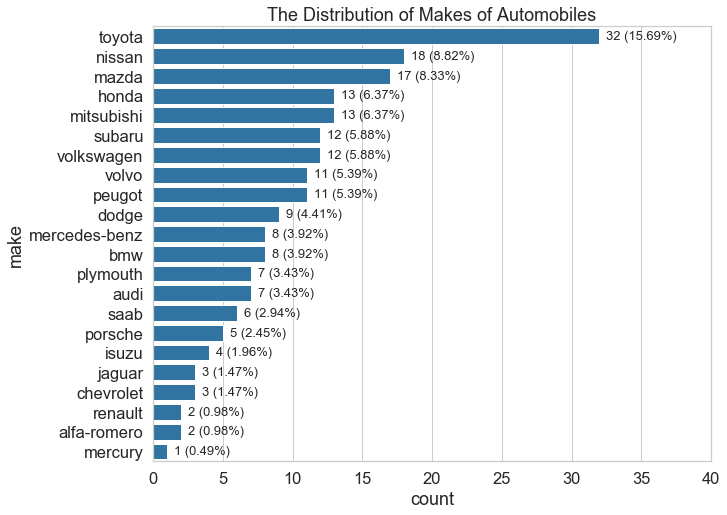

In [38]:
category_plot(df,'make','The Distribution of Makes of Automobiles', bar_type='vertical')
plt.xlim(0,40);

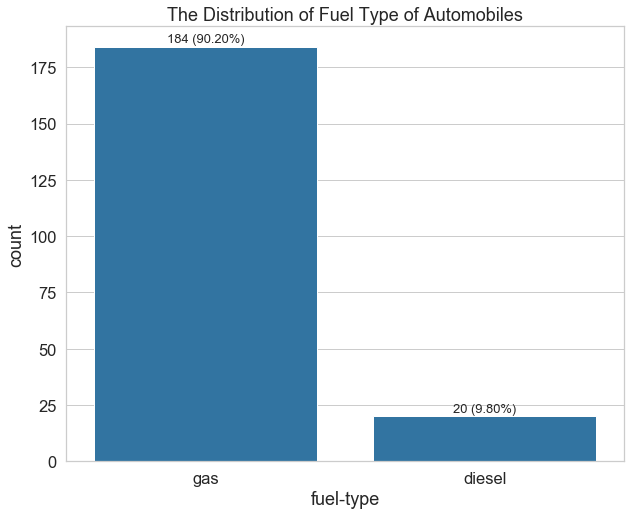

In [39]:
category_plot(df,'fuel-type','The Distribution of Fuel Type of Automobiles', bar_type='horizontal')

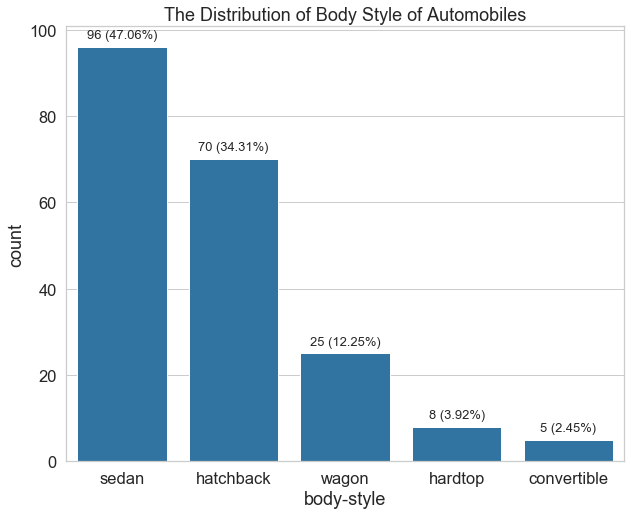

In [40]:
category_plot(df,'body-style','The Distribution of Body Style of Automobiles', bar_type='horizontal')

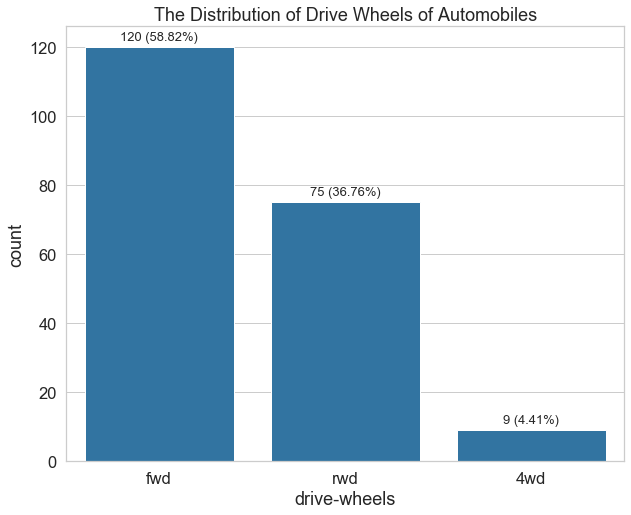

In [41]:
category_plot(df,'drive-wheels','The Distribution of Drive Wheels of Automobiles', bar_type='horizontal')

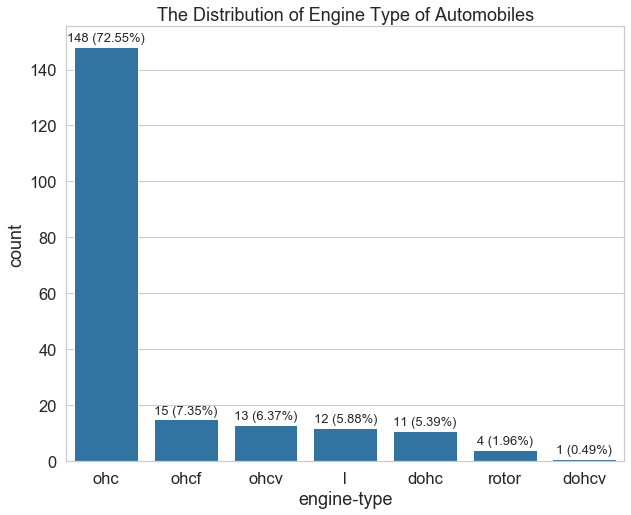

In [42]:
category_plot(df,'engine-type','The Distribution of Engine Type of Automobiles', bar_type='horizontal')

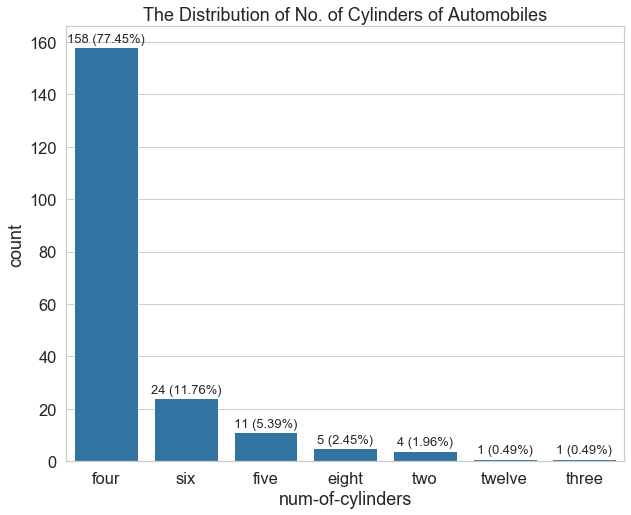

In [43]:
category_plot(df,'num-of-cylinders','The Distribution of No. of Cylinders of Automobiles', bar_type='horizontal')

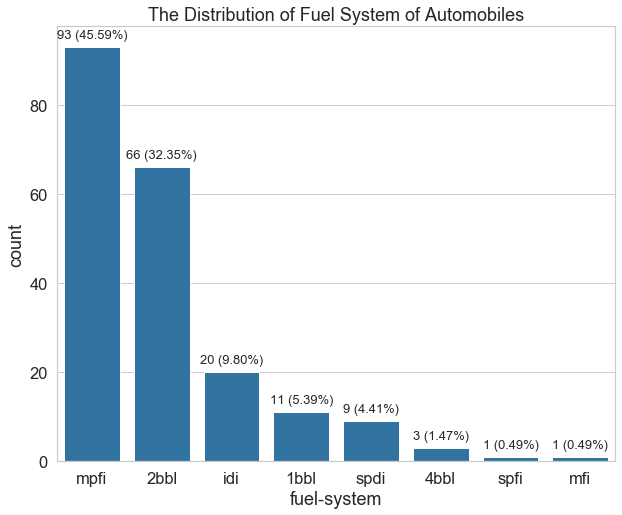

In [44]:
category_plot(df,'fuel-system','The Distribution of Fuel System of Automobiles', bar_type='horizontal')

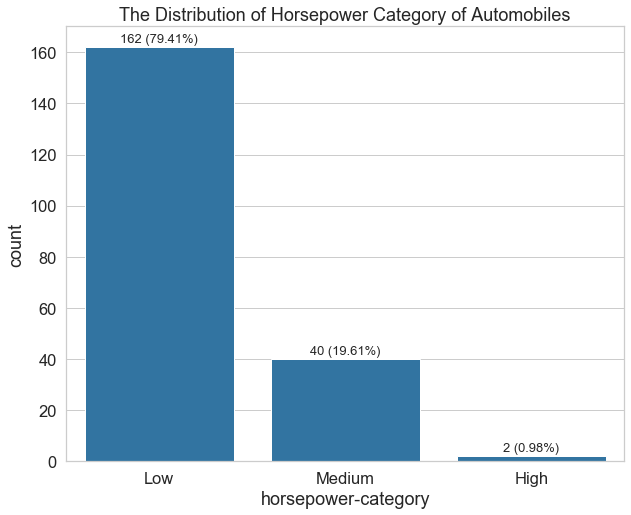

In [45]:
category_plot(df,'horsepower-category','The Distribution of Horsepower Category of Automobiles', bar_type='horizontal')

### Numerical Variables

In [46]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000,204.000000,204.000000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.25830,10.148137,104.220588,5125.980392,25.240196,30.769608,13205.6900,9.943442,8.031066
std,1.239035,31.758944,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.31175,3.981000,39.613594,478.071114,6.551513,6.898337,7888.0996,2.577956,1.853735
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.0000,4.795918,4.351852
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.11000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.7500,7.833333,6.815768
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.0000,9.791667,7.833333
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.41000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.0000,12.368421,9.400000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.17000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.0000,18.076923,14.687500


In [47]:
df.select_dtypes(include=['int64','int32','float64']).columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-l/100km', 'highway-l/100km'],
      dtype='object')

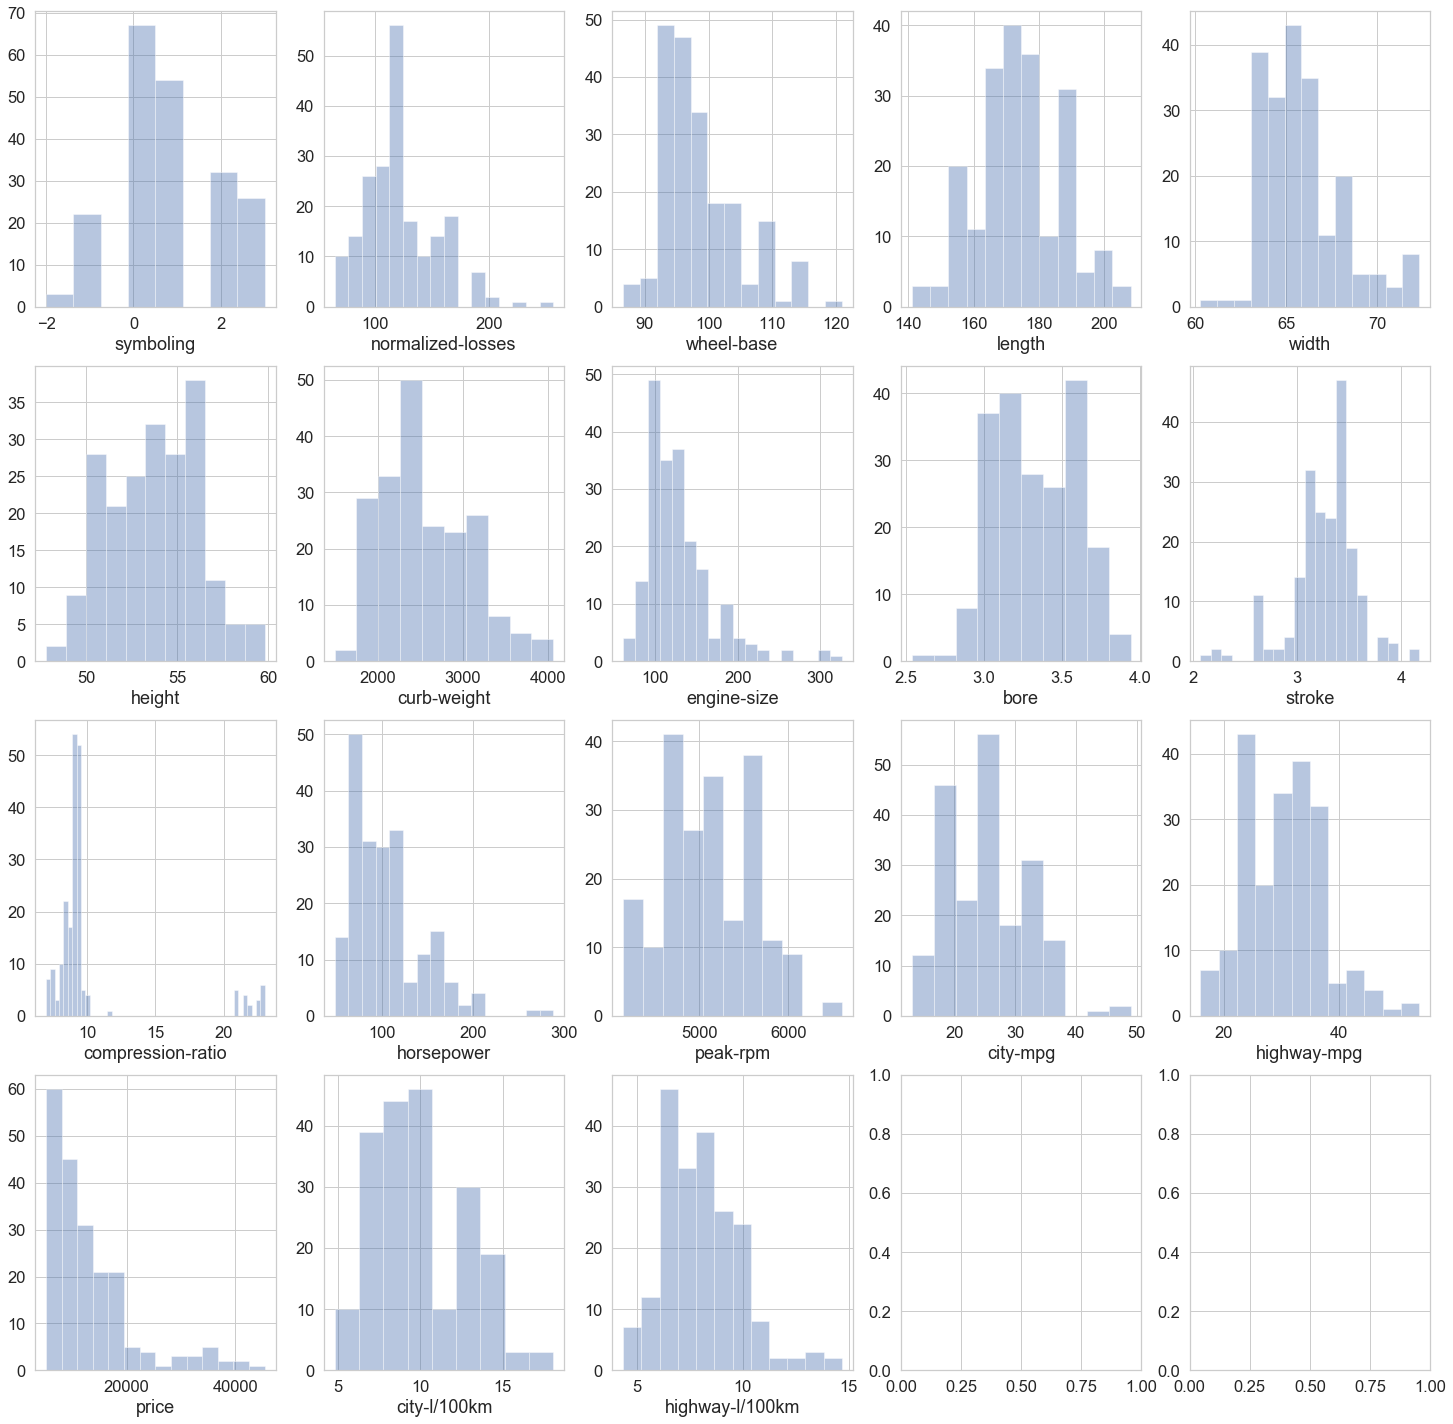

In [48]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25,25))
for i, column in enumerate(df.select_dtypes(include=['int64','int32','float64']).columns):
    #print (i, column)
    sns.distplot(df[column],ax=axes[i//5,i%5], kde=False)

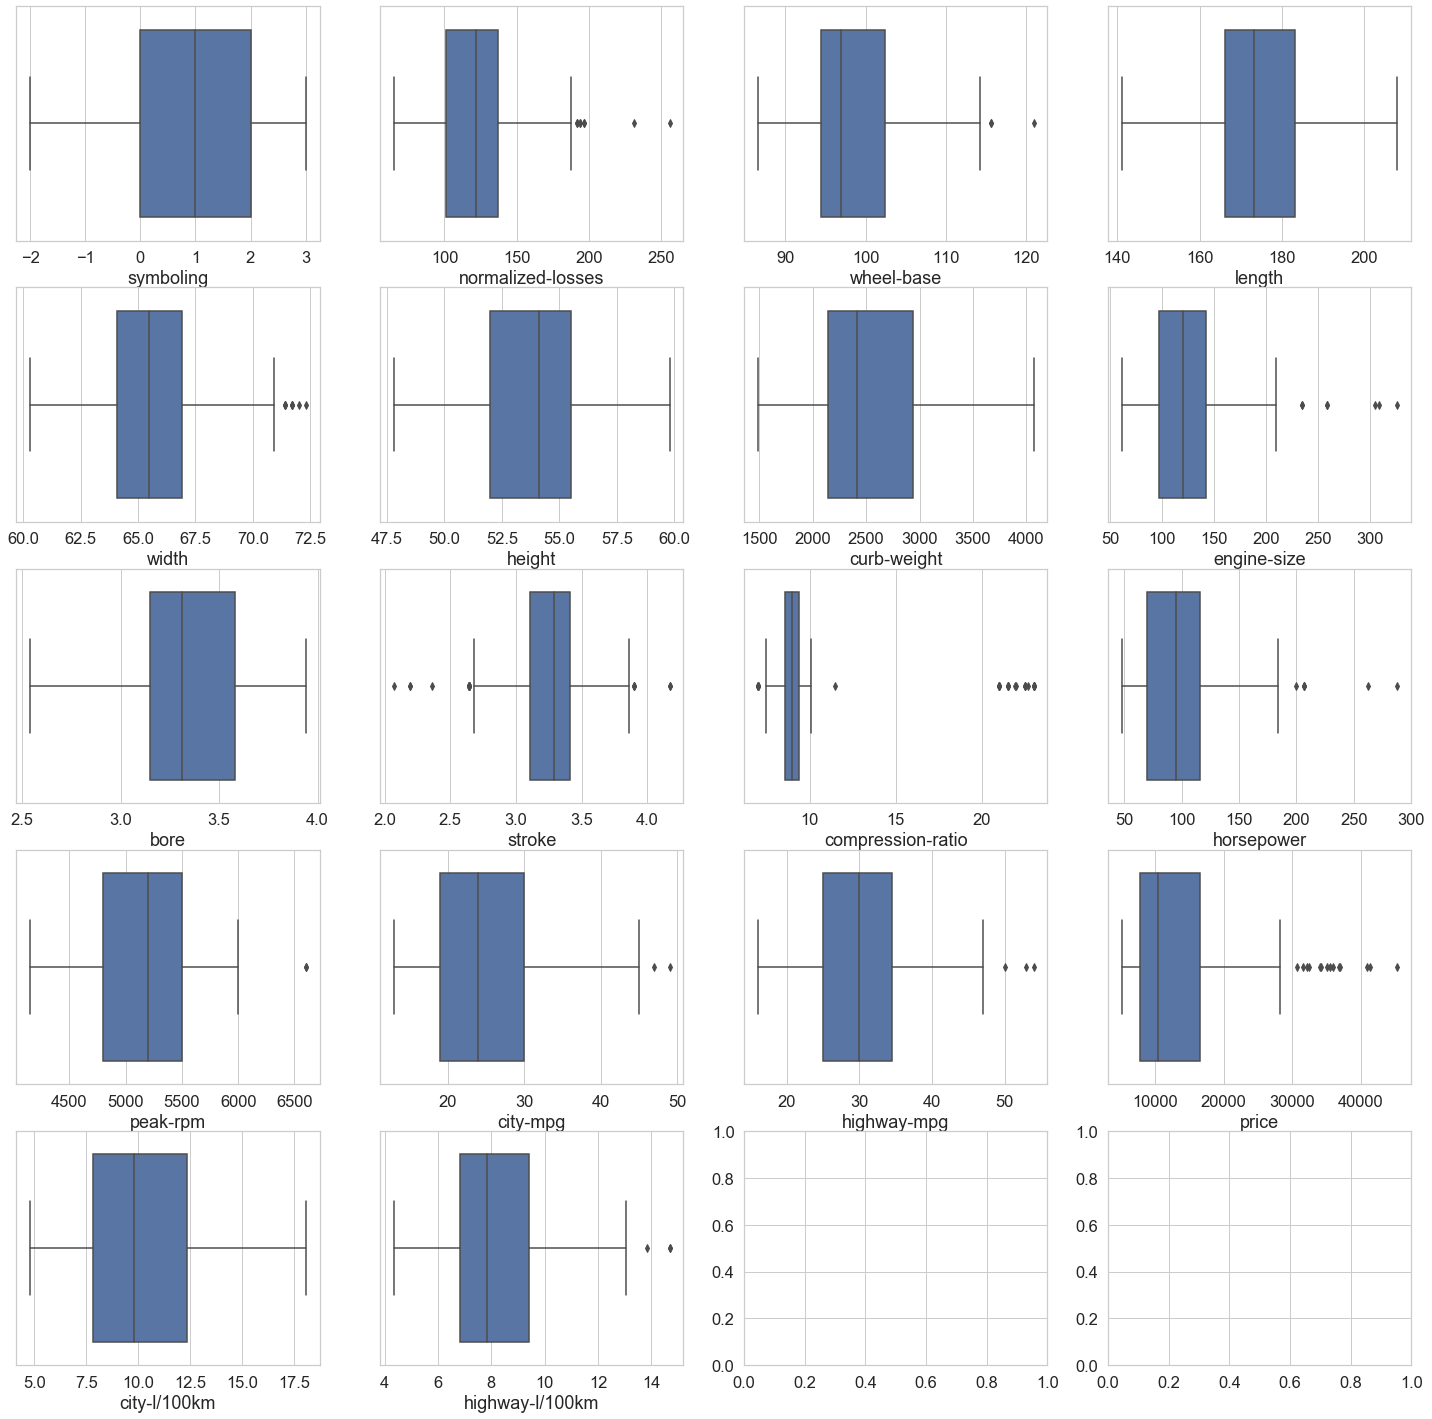

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,25))
for i, column in enumerate(df.select_dtypes(include=['int64','int32','float64']).columns):
    #print (i, column)
    sns.boxplot(x=df[column], ax=axes[i//4,i%4])

## bivariate Exploration

### Categorical variables vs. price

In [50]:
required_x = ['fuel-type','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system',
              'horsepower-category']

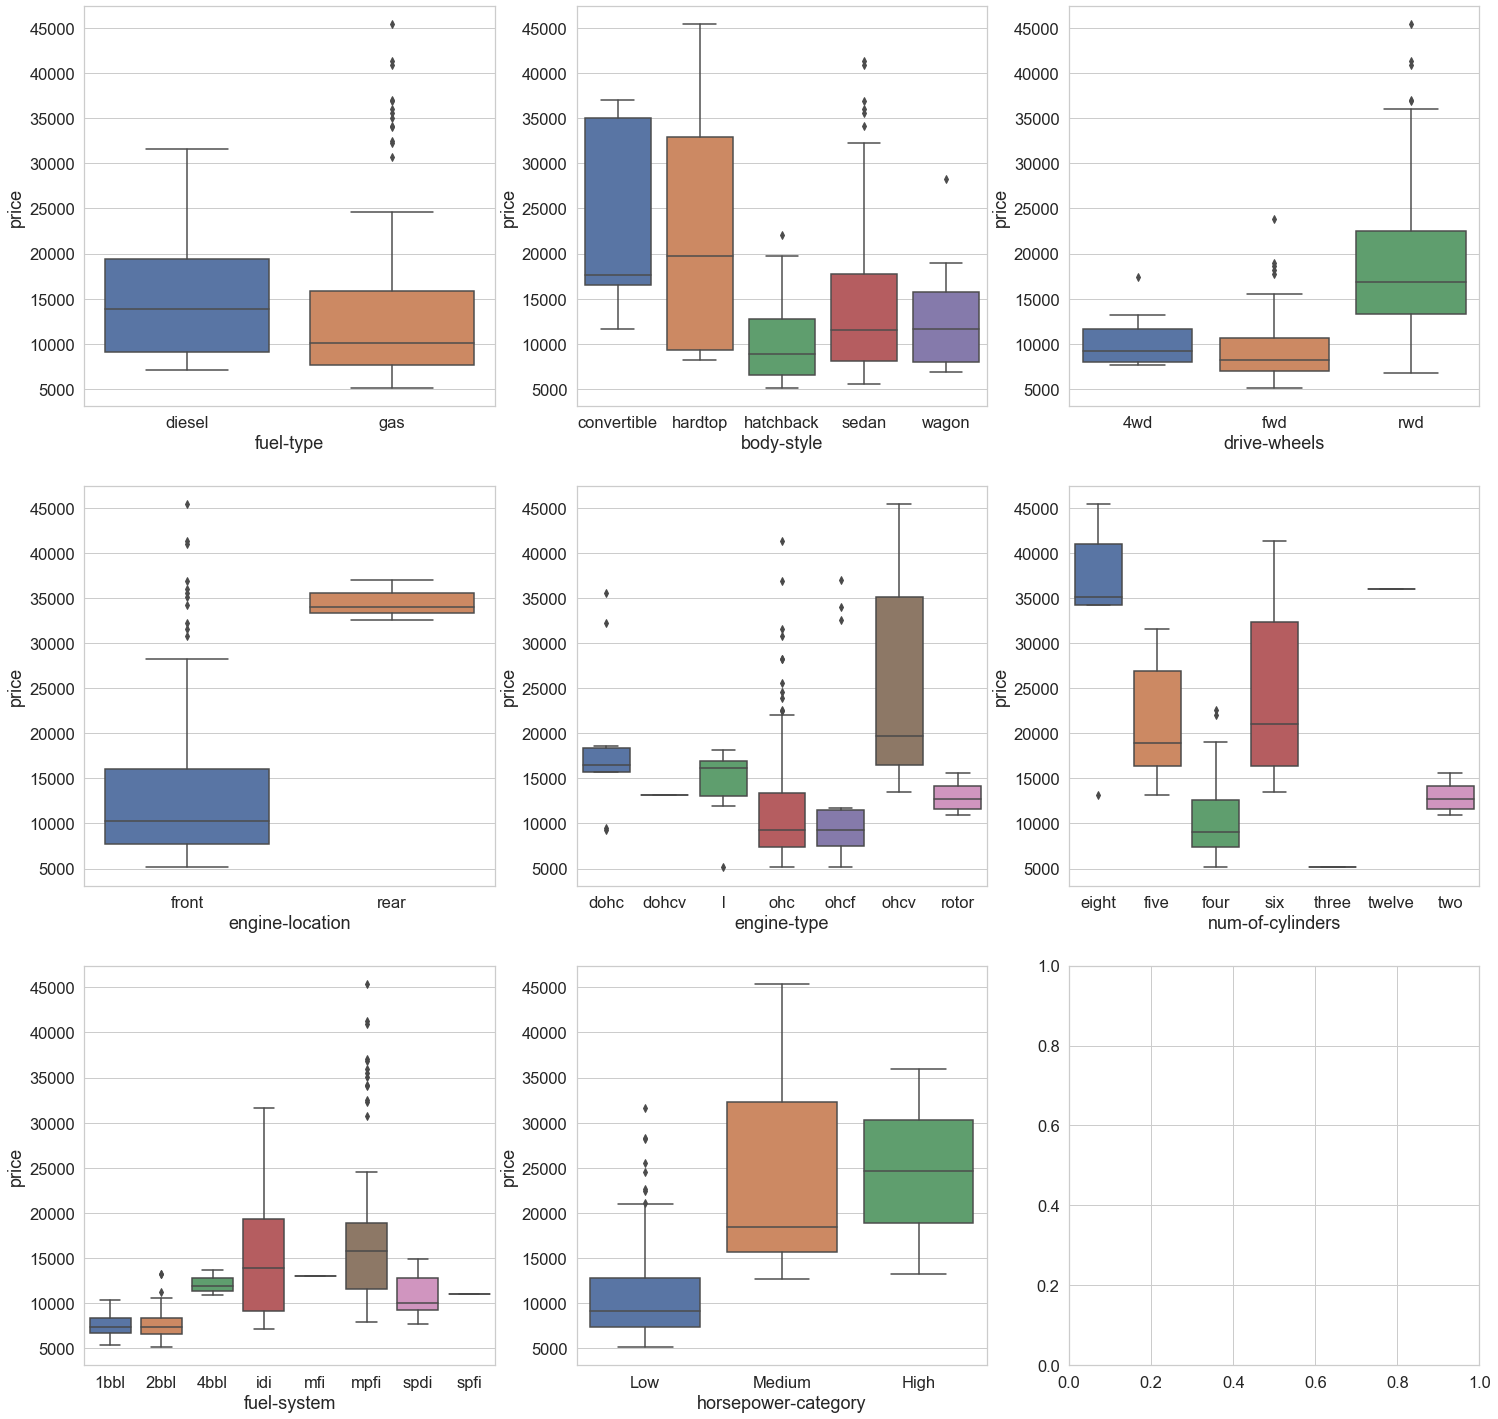

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))
for i, column in enumerate(required_x):
    #print (i, column)
    ax = sns.boxplot(x=column, y="price", data=df,ax=axes[i//3,i%3])

### Numerical variables vs. price

In [52]:
df.corr()[-3:-2]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
price,-0.083136,0.133999,0.587607,0.683372,0.73013,0.136123,0.820831,0.861753,0.532562,0.083115,0.071058,0.757968,-0.100824,-0.668021,-0.690937,1.0,0.770768,0.78954


In [53]:
x = df.corr()
x = x[x.index == 'price']

In [54]:
x

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
price,-0.083136,0.133999,0.587607,0.683372,0.73013,0.136123,0.820831,0.861753,0.532562,0.083115,0.071058,0.757968,-0.100824,-0.668021,-0.690937,1.0,0.770768,0.78954


In [55]:
x.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-l/100km', 'highway-l/100km'],
      dtype='object')

In [56]:
x = x[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg',
       'highway-mpg','price','city-l/100km', 'highway-l/100km']]

In [57]:
x

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
price,0.587607,0.683372,0.73013,0.820831,0.861753,0.532562,0.757968,-0.668021,-0.690937,1.0,0.770768,0.78954


In [58]:
xx = df.corr()['price']
xx = xx[xx.index.isin(['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg',
       'highway-mpg','price','city-l/100km', 'highway-l/100km'])]
xx

wheel-base         0.587607
length             0.683372
width              0.730130
curb-weight        0.820831
engine-size        0.861753
bore               0.532562
horsepower         0.757968
city-mpg          -0.668021
highway-mpg       -0.690937
price              1.000000
city-l/100km       0.770768
highway-l/100km    0.789540
Name: price, dtype: float64

In [59]:
xx[0]

0.5876069430699067

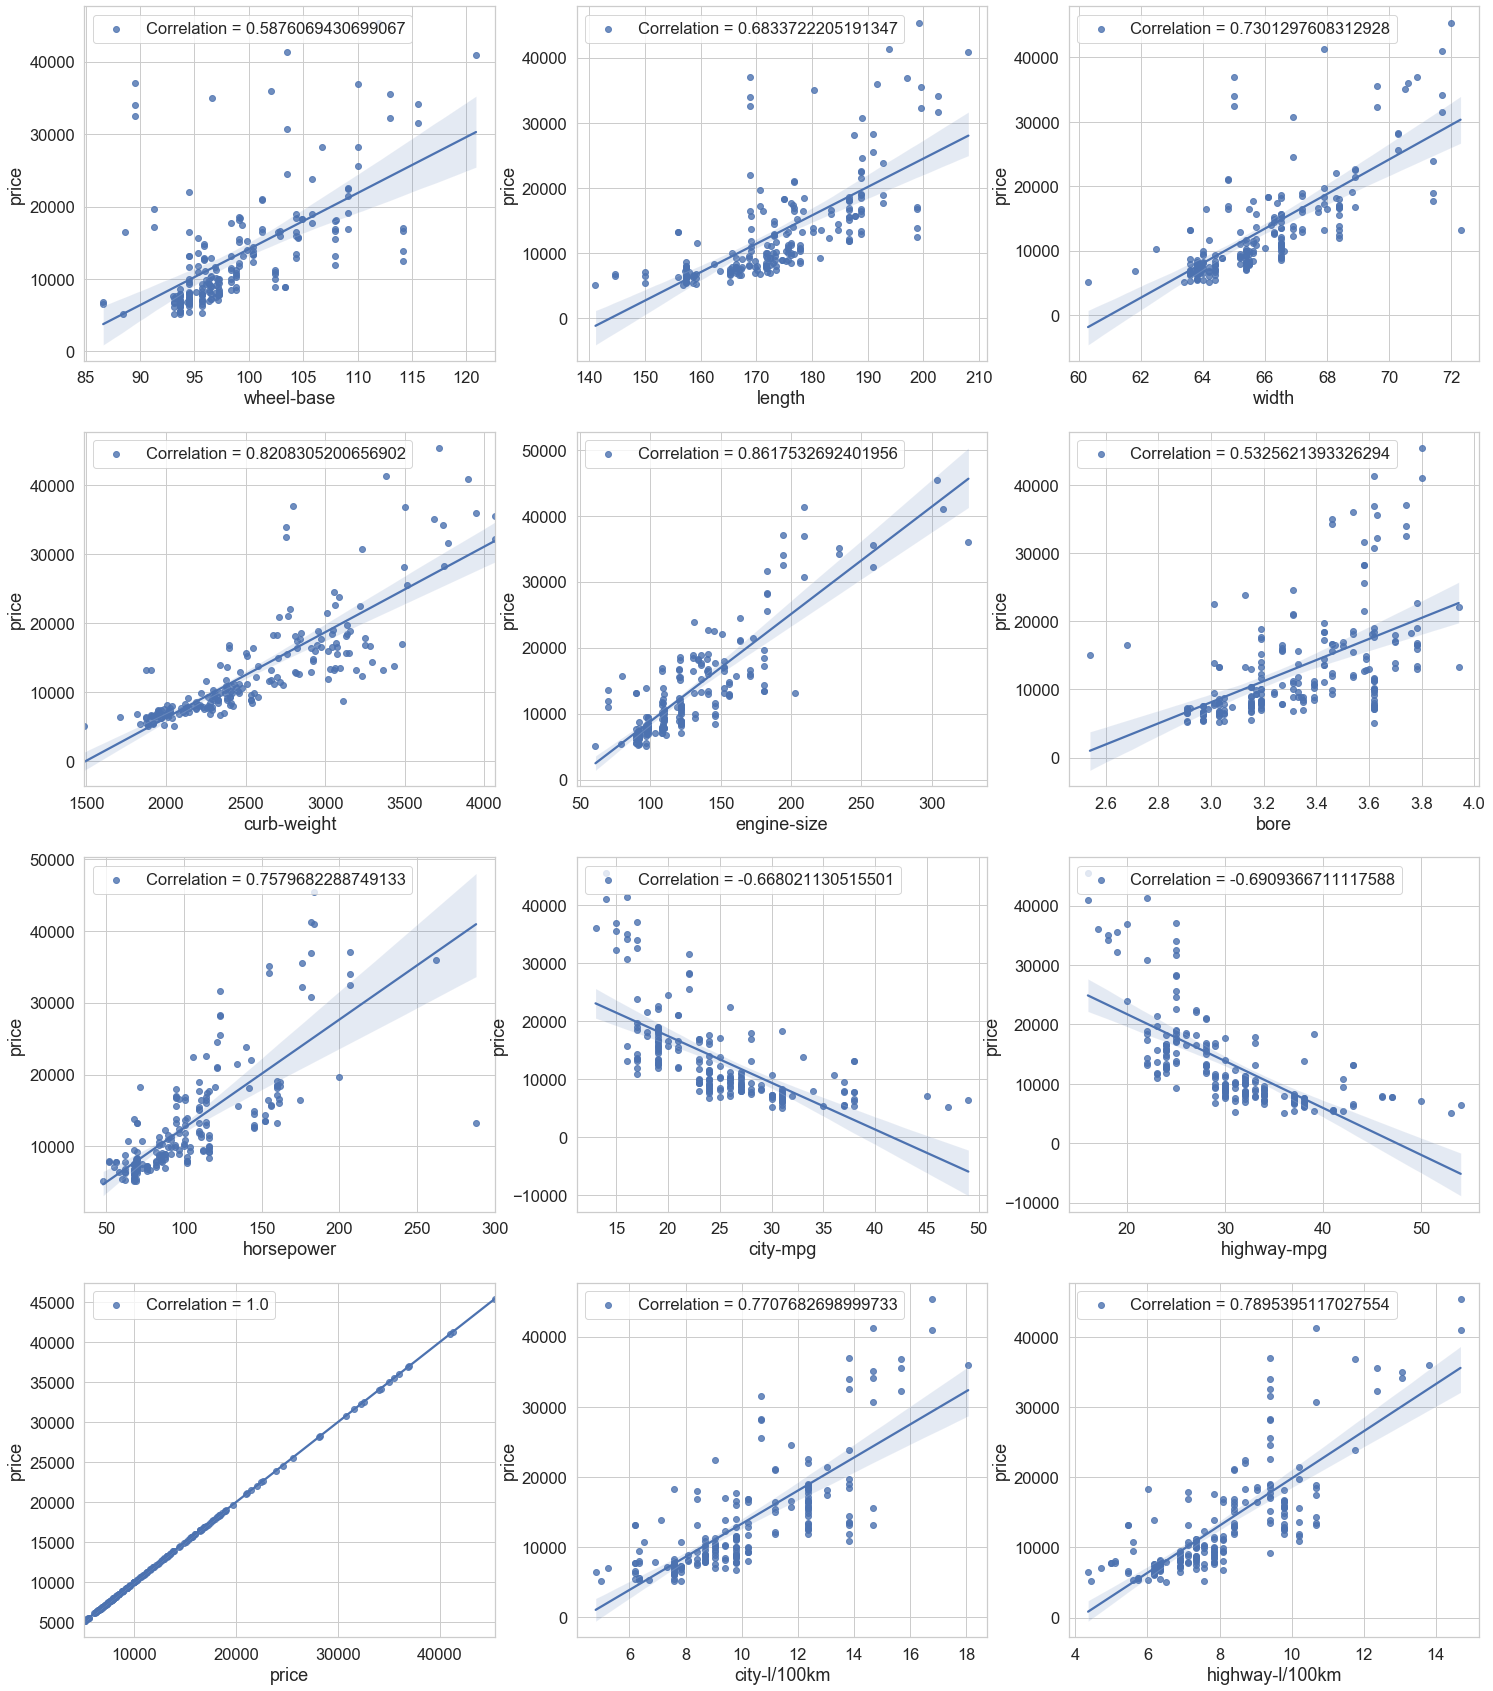

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,30))
for i, column in enumerate(x.columns):
    #print (i, column)
    ax = sns.regplot(x=column, y="price", data=df,ax=axes[i//3,i%3], label=f'Correlation = {xx[i]}')
    ax.legend(loc='upper left')
    #ax.set_title(f'corr. bet. {column} vs price')

In [61]:
numerical_data = df.select_dtypes(include=['int64','int32','float64'])
numerical_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
1,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818
4,2,122,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.0,12.368421,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,10.217391,8.392857
200,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,12.368421,9.400000
201,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,13.055556,10.217391
202,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,9.038462,8.703704


In [62]:
from scipy import stats

In [63]:
for column in numerical_data.columns:
    (pearson_coef,p_value)=stats.pearsonr(numerical_data[column],df['price'])
    print(column)
    print("pearson_coef = {f}    ,p_value = {p}".format(f=pearson_coef,p=p_value))
    print("")

symboling
pearson_coef = -0.08313591024498904    ,p_value = 0.23713845605196515

normalized-losses
pearson_coef = 0.13399917605642053    ,p_value = 0.056035847327566016

wheel-base
pearson_coef = 0.587606943069908    ,p_value = 2.4956275145450056e-20

length
pearson_coef = 0.683372220519136    ,p_value = 2.047947360410426e-29

width
pearson_coef = 0.7301297608312934    ,p_value = 2.9928320375398796e-35

height
pearson_coef = 0.1361231045130299    ,p_value = 0.05221878566294398

curb-weight
pearson_coef = 0.8208305200656918    ,p_value = 5.01577265864044e-51

engine-size
pearson_coef = 0.8617532692401951    ,p_value = 1.9093505826893827e-61

bore
pearson_coef = 0.5325621393326307    ,p_value = 2.4348635520892015e-16

stroke
pearson_coef = 0.08311505653754381    ,p_value = 0.2372565232189463

compression-ratio
pearson_coef = 0.0710579078299515    ,p_value = 0.31251887418162116

horsepower
pearson_coef = 0.7579682288749143    ,p_value = 2.4251388979632696e-39

peak-rpm
pearson_coef = -0.1

# Model Development

In [3]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

## Simple Linear Regression

In [65]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [66]:
df.select_dtypes(include=['int64','int32','float64']).head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
1,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333


In [67]:
numerical_data.head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
1,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333


In [68]:
x_data = numerical_data.drop(['price'], axis=1)
y_data = numerical_data['price']

- engine-size with price: pearson_coef = 0.8617532692401951    ,p_value = 1.9093505826893827e-61

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x_train[['engine-size']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_hat = lr.predict(x_test[['engine-size']])
y_hat

array([25743.67181885,  9916.43541547, 16811.46909615,  8349.38230623,
       21669.33373481, 11640.19383564, 11953.60445749,  8349.38230623,
       20102.28062557,  8192.6769953 , 21669.33373481,  8349.38230623,
       15871.23723061,  7409.15044068,  3961.63360034,  8192.6769953 ,
        7095.73981883, 10229.84603732,  3961.63360034,  9916.43541547,
       19788.87000372,  8192.6769953 ,  8192.6769953 ,  7409.15044068,
       23393.09215498, 25743.67181885, 12110.30976842, 10229.84603732,
       11953.60445749, 16654.76378523, 13990.77349951, 21669.33373481,
       24803.4399533 , 21669.33373481,  7409.15044068, 21355.92311296,
        9916.43541547,  9916.43541547,  9916.43541547, 12110.30976842,
       17438.29033985])

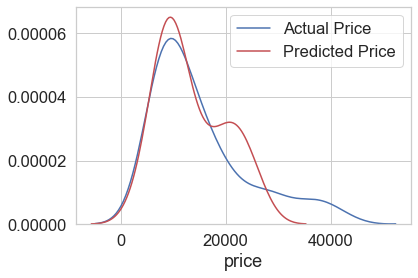

In [73]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [74]:
print( f'Train R-squared: {lr.score(x_train[["engine-size"]], y_train)}' )
print( f'Test R-squared: {lr.score(x_test[["engine-size"]], y_test)}' )

Train R-squared: 0.7872979804182751
Test R-squared: 0.6027911169459088


In [75]:
# from sklearn.metrics import mean_squared_error

In [76]:
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

MSE is 5797.429167943427


- highway-l/100km with price: pearson_coef = 0.7895395117027557    ,p_value = 1.0403380330746789e-44

In [77]:
lr.fit(x_train[['highway-l/100km']],y_train)
y_hat = lr.predict(x_test[['highway-l/100km']])
y_hat

array([21376.36211119, 13008.38922761,  9820.59003387, 12131.74444933,
       17216.28416336, 13008.38922761, 13947.65149005,  9140.8387352 ,
       19869.08749241,  3289.06668581, 17216.28416336,  9140.8387352 ,
       12131.74444933,  7322.04471985, 19869.08749241,  6779.59738194,
        4445.81232348, 12131.74444933, 19869.08749241, 11311.65739868,
       18487.41909186,  7322.04471985,  7322.04471985,  6779.59738194,
       17216.28416336, 24843.09373439, 10542.8257887 , 12131.74444933,
       16042.92884473, 14956.4887349 ,  6264.96785623, 17216.28416336,
       13947.65149005, 17216.28416336,  6779.59738194, 21376.36211119,
        7322.04471985, 11311.65739868, 13008.38922761, 10542.8257887 ,
       18487.41909186])

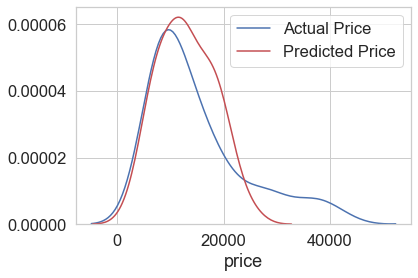

In [78]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [79]:
print( f'Train R-squared: {lr.score(x_train[["highway-l/100km"]], y_train)}' )
print( f'Test R-squared: {lr.score(x_test[["highway-l/100km"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.6955815190429111
Test R-squared: 0.4024029407386114
MSE is 7110.992177014854


- horsepower with price: pearson_coef = 0.7579682288749143    ,p_value = 2.4251388979632696e-39

In [80]:
lr.fit(x_train[['horsepower']],y_train)
y_hat = lr.predict(x_test[['horsepower']])
y_hat

array([25596.97043126, 12505.59192268, 11535.8601813 , 12667.21387957,
       16061.27497439, 10727.75039682, 13960.18953474,  7495.3112589 ,
       17839.11650025,  4586.11603477, 16061.27497439,  7495.3112589 ,
       14929.92127612,  6202.33560373, 12505.59192268,  7172.06734511,
        7495.3112589 , 14929.92127612, 12505.59192268, 11374.23822441,
       22202.90933644,  7333.68930201,  7333.68930201,  8465.04300028,
       29637.51935366, 25596.97043126, 11050.99431061, 14929.92127612,
       22041.28737954, 19293.71411231,  7818.55517269, 16061.27497439,
       42728.89786223, 16061.27497439,  7172.06734511, 20748.31172437,
        9434.77474165,  7980.17712959, 14121.81149164, 10404.50648303,
       19616.9580261 ])

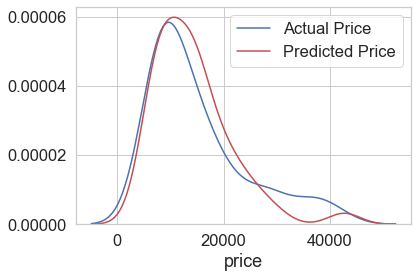

In [81]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [82]:
print( f'Train R-squared: {lr.score(x_train[["horsepower"]], y_train)}' )
print( f'Test R-squared: {lr.score(x_test[["horsepower"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.6687432065219395
Test R-squared: 0.2951466328373019
MSE is 7722.810251409713


- curb-weight with price: pearson_coef = 0.8208305200656918    ,p_value = 5.01577265864044e-51

In [83]:
lr.fit(x_train[['curb-weight']],y_train)
y_hat = lr.predict(x_test[['curb-weight']])
y_hat

array([22769.58516593, 11066.95950678, 21248.83787215,  8096.74994862,
       24373.49832733, 15094.56366764, 14631.21097657,  8037.34575745,
       18397.43669631,  9474.9271836 , 27403.11207666,  8797.71940434,
       12742.15769758,  9700.66311002, 10948.15112445, 13253.03374158,
        4877.04278757, 10769.93855096, 10888.74693329, 11779.80980073,
       17969.72651994,  6469.07511074,  6029.48409614,  4223.59668477,
       15878.69899099, 24254.68994501, 11292.6954332 , 11162.00621264,
       15973.74569686, 15617.32054988, 14690.61516773, 24135.88156268,
       22603.25343067, 27165.495312  ,  5708.70146385, 19383.54626962,
        8096.74994862,  7799.7289928 , 12433.25590353, 10710.5343598 ,
       17316.28041714])

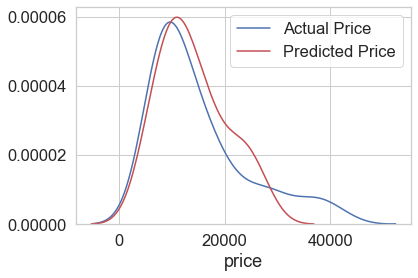

In [84]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [85]:
print( f'Train R-squared: {lr.score(x_train[["curb-weight"]], y_train)}' )
print( f'Test R-squared: {lr.score(x_test[["curb-weight"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.6848317314499173
Test R-squared: 0.6197720594124588
MSE is 5672.15367567271


### Use Robuster Scaler

In [86]:
# from sklearn.preprocessing import RobustScaler

In [87]:
scaler = RobustScaler()

In [88]:
scaler.fit(x_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [89]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)

In [91]:
lr.fit(x_train_scaled[['curb-weight']],y_train)
y_hat = lr.predict(x_test_scaled[['curb-weight']])
y_hat

array([22769.58516593, 11066.95950678, 21248.83787215,  8096.74994862,
       24373.49832733, 15094.56366764, 14631.21097657,  8037.34575745,
       18397.43669631,  9474.9271836 , 27403.11207666,  8797.71940434,
       12742.15769758,  9700.66311002, 10948.15112445, 13253.03374158,
        4877.04278757, 10769.93855096, 10888.74693329, 11779.80980073,
       17969.72651994,  6469.07511074,  6029.48409614,  4223.59668477,
       15878.69899099, 24254.68994501, 11292.6954332 , 11162.00621264,
       15973.74569686, 15617.32054988, 14690.61516773, 24135.88156268,
       22603.25343067, 27165.495312  ,  5708.70146385, 19383.54626962,
        8096.74994862,  7799.7289928 , 12433.25590353, 10710.5343598 ,
       17316.28041714])

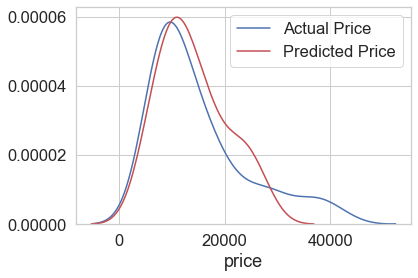

In [92]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [93]:
print( f'Train R-squared: {lr.score(x_train_scaled[["curb-weight"]], y_train)}' )
print( f'Test R-squared: {lr.score(x_test_scaled[["curb-weight"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.6848317314499173
Test R-squared: 0.6197720594124589
MSE is 5672.153675672709


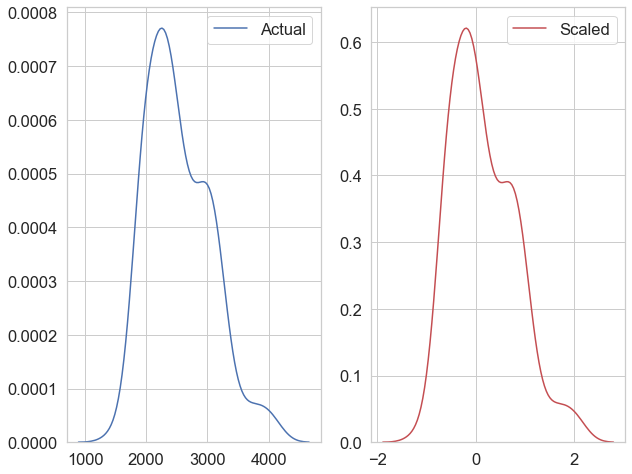

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax_actual = sns.distplot(x_train[['curb-weight']], hist=False, color='b',label='Actual',ax=axes[0]);
ax_scaled = sns.distplot(x_train_scaled[['curb-weight']], hist=False, color='r',label='Scaled', ax=axes[1]);

## Multi-Linear Regression

- engine-size with price: pearson_coef = 0.8617532692401951    ,p_value = 1.9093505826893827e-61
- highway-l/100km with price: pearson_coef = 0.7895395117027557    ,p_value = 1.0403380330746789e-44
- horsepower with price: pearson_coef = 0.7579682288749143    ,p_value = 2.4251388979632696e-39
- curb-weight with price: pearson_coef = 0.8208305200656918    ,p_value = 5.01577265864044e-51

In [95]:
mlr = LinearRegression()

In [96]:
mlr.fit(x_train[['engine-size','curb-weight','horsepower','highway-l/100km']],y_train)
y_hat = mlr.predict(x_test[['engine-size','curb-weight','horsepower','highway-l/100km']])
y_hat

array([25743.3854387 , 10918.33328703, 15020.44595819,  9446.85700282,
       21003.48172652, 12125.38339735, 12954.38984604,  7912.05285723,
       20481.40457917,  5873.89346956, 21293.99435738,  7984.96583125,
       14739.98647317,  6805.42058453,  9304.37959631,  7584.91750703,
        5473.938498  , 11129.48581025,  9298.68327021, 10346.94823479,
       20396.99424678,  7113.64910495,  7071.49629184,  6407.21719585,
       22949.32909292, 26900.89604581, 11364.81920249, 11167.08156248,
       14717.48332848, 16869.25105527, 11170.16631271, 20980.69642214,
       25146.15180856, 21271.209053  ,  6386.29206007, 22145.11963665,
        8580.56750551,  9536.54450496, 11253.51539743, 11227.32856267,
       18582.09198484])

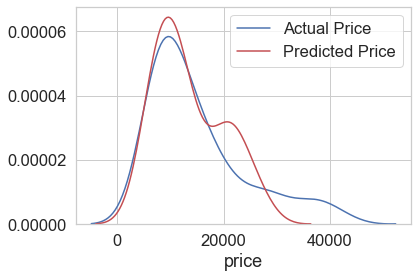

In [97]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [98]:
print( f'Train R-squared: {mlr.score(x_train[["engine-size","curb-weight","horsepower","highway-l/100km"]], y_train)}' )
print( f'Test R-squared: {mlr.score(x_test[["engine-size","curb-weight","horsepower","highway-l/100km"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.831301514018749
Test R-squared: 0.6311644699897317
MSE is 5586.532762682821


### All Features:

In [99]:
mlr.fit(x_train,y_train)
y_hat = mlr.predict(x_test)
y_hat

array([26446.87111717, 13288.600183  , 15070.89028222,  8140.06658466,
       20568.03131151,  9893.99108133, 13771.51384488,  6848.20414155,
       23297.86920949, 10103.82973194, 21061.31125243,  6647.35927657,
       12738.01267624,  6990.67414546, 10797.21166998,  8530.5876444 ,
        6991.31706802,  9937.26630851, 10798.98595769, 10508.50196561,
       20143.04765277,  7385.51325927,  7115.21896652,  7073.07723163,
       25223.32272495, 29889.41751445,  8307.16829213,  9975.26169838,
       16523.35062902, 18281.12181945, 12117.45448742, 20045.41964904,
       28604.32230299, 21018.10345997,  7229.28534378, 22606.44953923,
        8838.93098746,  8843.22793039, 10556.84314952,  9428.92728845,
       15211.12971817])

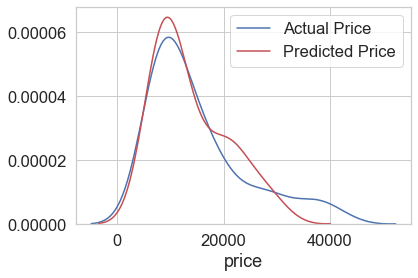

In [100]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [101]:
print( f'Train R-squared: {mlr.score(x_train, y_train)}' )
print( f'Test R-squared: {mlr.score(x_test, y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.875003695185776
Test R-squared: 0.6665460792976868
MSE is 5311.826596078589


### Normalized Multi-variables:

In [102]:
mlr_normalized = LinearRegression(normalize=True)

In [103]:
mlr_normalized.fit(x_train[['engine-size','curb-weight','horsepower','highway-l/100km']],y_train)
y_hat = mlr_normalized.predict(x_test[['engine-size','curb-weight','horsepower','highway-l/100km']])
y_hat

array([25743.3854387 , 10918.33328703, 15020.44595819,  9446.85700282,
       21003.48172652, 12125.38339735, 12954.38984604,  7912.05285723,
       20481.40457917,  5873.89346956, 21293.99435738,  7984.96583125,
       14739.98647317,  6805.42058453,  9304.37959631,  7584.91750703,
        5473.938498  , 11129.48581025,  9298.68327021, 10346.94823479,
       20396.99424678,  7113.64910495,  7071.49629184,  6407.21719585,
       22949.32909292, 26900.89604581, 11364.81920249, 11167.08156248,
       14717.48332848, 16869.25105527, 11170.16631271, 20980.69642214,
       25146.15180856, 21271.209053  ,  6386.29206007, 22145.11963665,
        8580.56750551,  9536.54450496, 11253.51539743, 11227.32856267,
       18582.09198484])

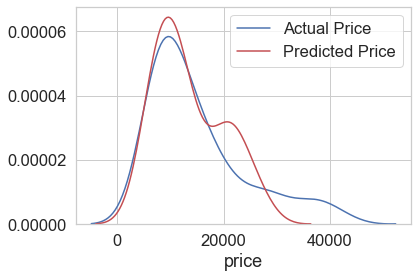

In [104]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [105]:
print( f'Train R-squared: {mlr_normalized.score(x_train[["engine-size","curb-weight","horsepower","highway-l/100km"]], y_train)}' )
print( f'Test R-squared: {mlr_normalized.score(x_test[["engine-size","curb-weight","horsepower","highway-l/100km"]], y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train R-squared: 0.831301514018749
Test R-squared: 0.6311644699897314
MSE is 5586.532762682824


In [106]:
mlr.fit(x_train_scaled[['engine-size','curb-weight','horsepower','highway-l/100km']],y_train)
y_hat = mlr.predict(x_test_scaled[['engine-size','curb-weight','horsepower','highway-l/100km']])
y_hat

array([25743.3854387 , 10918.33328703, 15020.44595819,  9446.85700282,
       21003.48172652, 12125.38339735, 12954.38984604,  7912.05285723,
       20481.40457917,  5873.89346956, 21293.99435738,  7984.96583125,
       14739.98647317,  6805.42058453,  9304.37959631,  7584.91750703,
        5473.938498  , 11129.48581025,  9298.68327021, 10346.94823479,
       20396.99424678,  7113.64910495,  7071.49629184,  6407.21719585,
       22949.32909292, 26900.89604581, 11364.81920249, 11167.08156248,
       14717.48332848, 16869.25105527, 11170.16631271, 20980.69642214,
       25146.15180856, 21271.209053  ,  6386.29206007, 22145.11963665,
        8580.56750551,  9536.54450496, 11253.51539743, 11227.32856267,
       18582.09198484])

## Polynomial Regression

### One Variable:

In [107]:
# from sklearn.preprocessing import PolynomialFeatures

In [108]:
order = [1,2,3,4,5]
for i in order:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train[['curb-weight']])
    x_test_poly = poly.fit_transform(x_test[['curb-weight']])
    lr.fit(x_train_poly,y_train)
    print(f"Order: {i}")
    print( f'Train_poly R-squared: {lr.score(x_train_poly, y_train)}' )
    print( f'Test_poly R-squared: {lr.score(x_test_poly, y_test)}' )
    print("")

    

Order: 1
Train_poly R-squared: 0.6848317314499173
Test_poly R-squared: 0.6197720594124588

Order: 2
Train_poly R-squared: 0.7224491025281413
Test_poly R-squared: 0.6234883221161502

Order: 3
Train_poly R-squared: 0.7244230497770657
Test_poly R-squared: 0.6183338780717396

Order: 4
Train_poly R-squared: 0.7255354179850511
Test_poly R-squared: 0.6157213363791942

Order: 5
Train_poly R-squared: 0.7248023138232457
Test_poly R-squared: 0.6170401315053032



In [109]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train[['curb-weight']])
x_test_poly = poly.fit_transform(x_test[['curb-weight']])
lr.fit(x_train_poly,y_train)
y_hat = lr.predict(x_test_poly)
y_hat

array([23355.55578617, 10226.983388  , 21180.34634767,  8215.35868937,
       25801.57417638, 13808.72416522, 13346.6254813 ,  8180.57927346,
       17479.56657544,  9082.27204336, 30847.1712244 ,  8641.90546204,
       11597.33081338,  9235.23678201, 10136.25378253, 12049.07720669,
        6638.62068821, 10001.76322081, 10091.20974909, 10789.3241015 ,
       16966.94512617,  7339.74658645,  7130.80224189,  6395.30375762,
       14620.37640574, 25615.04147399, 10401.72622351, 10300.18294943,
       14721.29043449, 14345.6855965 , 13405.14182524, 25429.3641564 ,
       23110.81628318, 30431.33657994,  6985.71986641, 18703.68698376,
        8215.35868937,  8043.6000718 , 11331.85463299,  9957.36072597,
       16205.17947202])

In [110]:
print( f'Train_poly R-squared: {lr.score(x_train_poly, y_train)}' )
print( f'Test_poly R-squared: {lr.score(x_test_poly, y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train_poly R-squared: 0.7224491025281413
Test_poly R-squared: 0.6234883221161502
MSE is 5644.366432775542


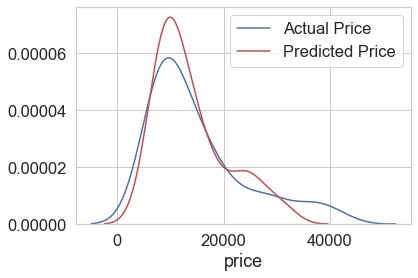

In [111]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

### Multi-Variables:

In [112]:
order = [1,2,3,4,5]
for i in order:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train[["engine-size","curb-weight","horsepower","highway-l/100km"]])
    x_test_poly = poly.fit_transform(x_test[["engine-size","curb-weight","horsepower","highway-l/100km"]])
    mlr.fit(x_train_poly,y_train)
    print(f"Order: {i}")
    print( f'Train_poly R-squared: {mlr.score(x_train_poly, y_train)}' )
    print( f'Test_poly R-squared: {mlr.score(x_test_poly, y_test)}' )
    print("")


Order: 1
Train_poly R-squared: 0.831301514018749
Test_poly R-squared: 0.6311644699897309

Order: 2
Train_poly R-squared: 0.8781189981786225
Test_poly R-squared: -0.05218335780667882

Order: 3
Train_poly R-squared: 0.9209050412956736
Test_poly R-squared: -13.23952636820116

Order: 4
Train_poly R-squared: 0.5818269395109545
Test_poly R-squared: -6445.99679349766

Order: 5
Train_poly R-squared: 0.8983647389343136
Test_poly R-squared: -1007555.8415526493



In [113]:
order = [1,2,3,4,5]
for i in order:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    mlr.fit(x_train_poly,y_train)
    print(f"Order: {i}")
    print( f'Train_poly R-squared: {mlr.score(x_train_poly, y_train)}' )
    print( f'Test_poly R-squared: {mlr.score(x_test_poly, y_test)}' )
    print("")

Order: 1
Train_poly R-squared: 0.8750036951857759
Test_poly R-squared: 0.6665460792976861

Order: 2
Train_poly R-squared: 0.999394274165008
Test_poly R-squared: -5185.056209422425

Order: 3
Train_poly R-squared: 0.9994864024087554
Test_poly R-squared: -9222.625414409198

Order: 4
Train_poly R-squared: 0.9994864024087554
Test_poly R-squared: -5919.956676502115

Order: 5
Train_poly R-squared: 0.9994864024087554
Test_poly R-squared: -9765.578134966736



In [114]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train[['curb-weight']])
x_test_poly = poly.fit_transform(x_test[['curb-weight']])
lr.fit(x_train_poly,y_train)
y_hat = lr.predict(x_test_poly)
y_hat

array([23355.55578617, 10226.983388  , 21180.34634767,  8215.35868937,
       25801.57417638, 13808.72416522, 13346.6254813 ,  8180.57927346,
       17479.56657544,  9082.27204336, 30847.1712244 ,  8641.90546204,
       11597.33081338,  9235.23678201, 10136.25378253, 12049.07720669,
        6638.62068821, 10001.76322081, 10091.20974909, 10789.3241015 ,
       16966.94512617,  7339.74658645,  7130.80224189,  6395.30375762,
       14620.37640574, 25615.04147399, 10401.72622351, 10300.18294943,
       14721.29043449, 14345.6855965 , 13405.14182524, 25429.3641564 ,
       23110.81628318, 30431.33657994,  6985.71986641, 18703.68698376,
        8215.35868937,  8043.6000718 , 11331.85463299,  9957.36072597,
       16205.17947202])

In [115]:
print( f'Train_poly R-squared: {lr.score(x_train_poly, y_train)}' )
print( f'Test_poly R-squared: {lr.score(x_test_poly, y_test)}' )
print(f'MSE is {np.sqrt(mean_squared_error(y_test, y_hat))}')

Train_poly R-squared: 0.7224491025281413
Test_poly R-squared: 0.6234883221161502
MSE is 5644.366432775542


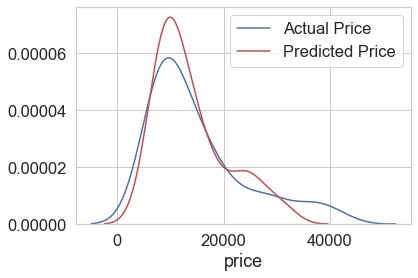

In [116]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [117]:
order = [1,2,3,4,5]
for i in order:
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train[['horsepower']])
    x_test_poly = poly.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_poly,y_train)
    print(f"Order: {i}")
    print( f'Train_poly R-squared: {lr.score(x_train_poly, y_train)}' )
    print( f'Test_poly R-squared: {lr.score(x_test_poly, y_test)}' )
    print("")

    

Order: 1
Train_poly R-squared: 0.6687432065219395
Test_poly R-squared: 0.2951466328373019

Order: 2
Train_poly R-squared: 0.6709357930361545
Test_poly R-squared: 0.2218805802940429

Order: 3
Train_poly R-squared: 0.6739350035100398
Test_poly R-squared: 0.3501389373030924

Order: 4
Train_poly R-squared: 0.6789050395608488
Test_poly R-squared: 0.5149136670816055

Order: 5
Train_poly R-squared: 0.6862589070188247
Test_poly R-squared: 0.4009033324979703



# Grid Search and Final Model

In [118]:
categorical_data = df.select_dtypes(include=['category','object'])

In [119]:
numerical_data = df.select_dtypes(include=['int64','int32','float64'])

In [120]:
for column in categorical_data.columns:
    print(column)
    print(categorical_data[column].unique())
    print("")

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
[gas, diesel]
Categories (2, object): [gas, diesel]

aspiration
[std, turbo]
Categories (2, object): [std, turbo]

num-of-doors
[two, four]
Categories (2, object): [two, four]

body-style
[convertible, hatchback, sedan, wagon, hardtop]
Categories (5, object): [convertible, hatchback, sedan, wagon, hardtop]

drive-wheels
[rwd, fwd, 4wd]
Categories (3, object): [rwd, fwd, 4wd]

engine-location
[front, rear]
Categories (2, object): [front, rear]

engine-type
[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
Categories (7, object): [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]

num-of-cylinders
[four, six, five, three, twelve, two, eight]
Categories (7, object): [four, six, five, three, twelve, two, eight]

fuel-system
[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]
Categor

In [121]:
len(categorical_data.make.unique())

22

In [122]:
chosen_data = df.copy()

In [123]:
categorical_data.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower-category'],
      dtype='object')

In [124]:
chosen_categories = ['make', 'fuel-type','num-of-doors','num-of-cylinders','body-style','drive-wheels','horsepower-category']

In [125]:
for column in categorical_data.columns:
    for index, category in enumerate(chosen_data[column].unique()):
        chosen_data[column].replace(category, index, inplace=True)
    chosen_data[column] = chosen_data[column].astype('int')    

In [126]:
chosen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            204 non-null    int64  
 1   normalized-losses    204 non-null    int32  
 2   make                 204 non-null    int32  
 3   fuel-type            204 non-null    int32  
 4   aspiration           204 non-null    int32  
 5   num-of-doors         204 non-null    int32  
 6   body-style           204 non-null    int32  
 7   drive-wheels         204 non-null    int32  
 8   engine-location      204 non-null    int32  
 9   wheel-base           204 non-null    float64
 10  length               204 non-null    float64
 11  width                204 non-null    float64
 12  height               204 non-null    float64
 13  curb-weight          204 non-null    int64  
 14  engine-type          204 non-null    int32  
 15  num-of-cylinders     204 non-null    int

In [127]:
for column in chosen_categories:
    print(column)
    print(chosen_data[column].unique())
    print("")

make
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

fuel-type
[0 1]

num-of-doors
[0 1]

num-of-cylinders
[0 1 2 3 4 5 6]

body-style
[0 1 2 3 4]

drive-wheels
[0 1 2]

horsepower-category
[0 1 2]



In [128]:
chosen_data['num-of-doors'].replace({0:2, 1:4}, inplace=True)
chosen_data['num-of-cylinders'].replace({0:4, 1:6, 2:5, 3:3, 4:12, 5:2, 6:8}, inplace=True)

In [129]:
for column in ['num-of-doors','num-of-cylinders']:
    print(column)
    print(chosen_data[column].unique())
    print("")

num-of-doors
[2 4]

num-of-cylinders
[ 4  6  5  3 12  2  8]



In [130]:
chosen_data.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,horsepower-category
symboling,1.000000,4.686949e-01,-0.103884,-0.192995,-0.056306,-0.660879,-0.387852,0.052623,2.151290e-01,-0.525095,...,0.007463,-0.177413,0.070449,0.278057,-0.030557,0.039598,-0.083136,0.059512,-0.033552,0.116518
normalized-losses,0.468695,1.000000e+00,-0.253343,-0.101464,-0.006826,-0.358339,-0.214956,-0.312160,-1.855222e-18,-0.056919,...,0.055551,-0.114548,0.203448,0.237788,-0.218973,-0.178351,0.133999,0.232815,0.178584,0.167734
make,-0.103884,-2.533434e-01,1.000000,0.111119,0.050280,0.142395,0.137243,-0.007366,5.395066e-02,0.063392,...,-0.222650,0.137386,-0.052553,-0.222985,0.047964,0.045263,-0.162639,-0.126254,-0.108243,-0.053026
fuel-type,-0.192995,-1.014639e-01,0.111119,1.000000,0.400964,0.187304,0.155933,-0.134736,-4.027807e-02,0.307866,...,0.240865,0.984353,-0.164949,-0.477690,0.255250,0.190702,0.110297,-0.235184,-0.153215,-0.163666
aspiration,-0.056306,-6.826386e-03,0.050280,0.400964,1.000000,0.050365,0.016513,-0.069545,-5.750495e-02,0.255656,...,0.220609,0.295097,0.240753,-0.184363,-0.204169,-0.255998,0.177465,0.175490,0.226825,0.205534
num-of-doors,-0.660879,-3.583390e-01,0.142395,0.187304,0.050365,1.000000,0.444895,0.098758,-1.402653e-01,0.434610,...,-0.017594,0.170764,-0.127636,-0.242589,-0.017966,-0.040667,0.042288,-0.032333,0.020998,-0.159909
body-style,-0.387852,-2.149563e-01,0.137243,0.155933,0.016513,0.444895,1.000000,-0.070778,1.267155e-01,0.357481,...,-0.019430,0.155451,0.050486,-0.151458,-0.103959,-0.134349,0.181108,0.081364,0.127727,-0.062590
drive-wheels,0.052623,-3.121601e-01,-0.007366,-0.134736,-0.069545,0.098758,-0.070778,1.000000,-1.491339e-01,-0.474845,...,-0.083780,-0.129689,-0.517864,0.038297,0.447811,0.450930,-0.578744,-0.479110,-0.465210,-0.361678
engine-location,0.215129,-1.855222e-18,0.053951,-0.040278,-0.057505,-0.140265,0.126716,-0.149134,1.000000e+00,-0.190144,...,-0.140757,-0.019939,0.317754,0.198285,-0.154037,-0.102431,0.331048,0.184330,0.090441,0.220537
wheel-base,-0.525095,-5.691863e-02,0.063392,0.307866,0.255656,0.434610,0.357481,-0.474845,-1.901441e-01,1.000000,...,0.147856,0.249199,0.355932,-0.365516,-0.479633,-0.552897,0.587607,0.481709,0.585439,0.212308


In [131]:
chosen_data.corr().loc[:,'price'].to_frame()

,price
symboling,-0.083136
normalized-losses,0.133999
make,-0.162639
fuel-type,0.110297
aspiration,0.177465
num-of-doors,0.042288
body-style,0.181108
drive-wheels,-0.578744
engine-location,0.331048
wheel-base,0.587607


In [132]:
chosen_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-l/100km', 'highway-l/100km',
       'horsepower-category'],
      dtype='object')

In [133]:
chosen_data.drop(columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration','num-of-doors', 'body-style',
                  'engine-location','height', 'engine-type','fuel-system', 'stroke','compression-ratio',
                  'peak-rpm', 'city-mpg','highway-mpg', 'horsepower-category'],inplace=True)

In [134]:
chosen_data.columns

Index(['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'price',
       'city-l/100km', 'highway-l/100km'],
      dtype='object')

In [135]:
chosen_data = chosen_data.reindex(columns=['drive-wheels', 'wheel-base','length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'city-l/100km','highway-l/100km','price'])

In [136]:
chosen_data.head(3)

,drive-wheels,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-l/100km,highway-l/100km,price
0,0,88.6,168.8,64.1,2548,4,130,3.47,111,11.190476,8.703704,16500.0
1,0,94.5,171.2,65.5,2823,6,152,2.68,154,12.368421,9.038462,16500.0
2,1,99.8,176.6,66.2,2337,4,109,3.19,102,9.791667,7.833333,13950.0


In [137]:
chosen_data.describe()

,drive-wheels,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-l/100km,highway-l/100km,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000
mean,0.676471,98.806373,174.075000,65.916667,2555.602941,4.382353,126.892157,3.329050,104.220588,9.943442,8.031066,13205.6900
std,0.555523,5.994144,12.362123,2.146716,521.960820,1.083182,41.744569,0.271331,39.613594,2.577956,1.853735,7888.0996
min,0.000000,86.600000,141.100000,60.300000,1488.000000,2.000000,61.000000,2.540000,48.000000,4.795918,4.351852,5118.0000
25%,0.000000,94.500000,166.300000,64.075000,2145.000000,4.000000,97.000000,3.150000,70.000000,7.833333,6.815768,7784.7500
50%,1.000000,97.000000,173.200000,65.500000,2414.000000,4.000000,119.500000,3.310000,95.000000,9.791667,7.833333,10470.0000
75%,1.000000,102.400000,183.200000,66.900000,2939.250000,4.000000,142.000000,3.582500,116.000000,12.368421,9.400000,16500.0000
max,2.000000,120.900000,208.100000,72.300000,4066.000000,12.000000,326.000000,3.940000,288.000000,18.076923,14.687500,45400.0000


In [138]:
chosen_data.corr().loc[:,'price'].to_frame()

,price
drive-wheels,-0.578744
wheel-base,0.587607
length,0.683372
width,0.730130
curb-weight,0.820831
num-of-cylinders,0.688043
engine-size,0.861753
bore,0.532562
horsepower,0.757968
city-l/100km,0.770768


In [139]:
# from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, accuracy_score

In [140]:
x_data = chosen_data.drop(['price'],axis=1)
y_data = chosen_data['price']

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=42)

In [142]:
# from sklearn.preprocessing import RobustScaler

In [143]:
scaler = RobustScaler()
scaler.fit(x_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [144]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [145]:
models = [LinearRegression(), Ridge(alpha=30), SVR(kernel='rbf',degree=3), DecisionTreeRegressor(max_depth=10), 
          RandomForestRegressor(n_estimators=100), XGBRegressor(n_estimators=10)]

In [146]:
for model in models:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print( f'Selected Model: {model}' )
    print( f'Train R-squared: {model.score(x_train, y_train)}' )
    print( f'Test R-squared: {model.score(x_test, y_test)}' )
    print( f'Square root of MSE for train is {np.sqrt(mean_squared_error(y_train, y_pred_train))}' )
    print( f'Square root of MSE for test is {np.sqrt(mean_squared_error(y_test, y_pred_test))}' )
    print("")

Selected Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Train R-squared: 0.8141762307727042
Test R-squared: 0.7103245421875762
Square root of MSE for train is 3342.705502757791
Square root of MSE for test is 4657.425505809451

Selected Model: Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Train R-squared: 0.7984970513138414
Test R-squared: 0.7023413226416984
Square root of MSE for train is 3480.8730671482235
Square root of MSE for test is 4721.166752054379

Selected Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Train R-squared: -0.11737578194894338
Test R-squared: -0.25541024349270325
Square root of MSE for train is 8196.85232535732
Square root of MSE for test is 9695.783293132035

Selected Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_

In [147]:
model = SVR()

In [148]:
params = [{'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}]
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=1, n_jobs=-1)

In [149]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  83 out of  90 | elapsed:   17.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.01],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [150]:
grid_search.cv_results_

{'mean_fit_time': array([0.01331658, 0.00450983, 0.00326066, 0.00407376, 0.00366387,
        0.        , 0.00625019, 0.00312524, 0.        , 0.00312529,
        0.00312467, 0.00937581, 0.00937543, 0.00312428, 0.00312533,
        0.00624943, 0.00312467, 0.00312467]),
 'std_fit_time': array([4.60824966e-03, 8.05241173e-04, 9.97720713e-04, 1.55595114e-05,
        8.13610220e-04, 0.00000000e+00, 7.65488934e-03, 6.25047684e-03,
        0.00000000e+00, 6.25057220e-03, 6.24933243e-03, 7.65531750e-03,
        7.65500621e-03, 6.24856949e-03, 6.25066757e-03, 7.65395464e-03,
        6.24933243e-03, 6.24933243e-03]),
 'mean_score_time': array([0.0008214 , 0.00163026, 0.00162997, 0.00164561, 0.00163302,
        0.00312705, 0.        , 0.00312486, 0.00625014, 0.00312495,
        0.00312495, 0.        , 0.        , 0.        , 0.00312533,
        0.        , 0.        , 0.00624943]),
 'std_score_time': array([0.0016428 , 0.00081516, 0.00081502, 0.00078383, 0.00081652,
        0.0062541 , 0.        , 

In [151]:
grid_search.best_score_

0.18485135935022112

In [152]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [153]:
model = RandomForestRegressor()

In [154]:
params = [{'n_estimators':[10, 50, 100, 150, 200, 250, 300]}]
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=1, n_jobs=-1)

In [155]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [156]:
grid_search.cv_results_

{'mean_fit_time': array([0.06262274, 0.23233552, 0.50793452, 0.7682972 , 1.01105971,
        1.20652843, 1.18114076]),
 'std_fit_time': array([0.00798385, 0.00993525, 0.0242513 , 0.03901361, 0.06705528,
        0.02701007, 0.15901188]),
 'mean_score_time': array([0.00231919, 0.00937476, 0.02937384, 0.04183078, 0.05309935,
        0.05869813, 0.05689321]),
 'std_score_time': array([0.00175909, 0.00765446, 0.01161071, 0.00785542, 0.00814745,
        0.01137174, 0.00826466]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 150, 200, 250, 300],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300}],
 'split0_test_score': array([0.64788517, 0.6385528 , 0.66085613, 0.64487664, 0.63189618,
        0.63528962, 0.63436867]),
 'split1_test_sco

In [157]:
grid_search.best_score_

0.851993967772065

In [158]:
grid_search.best_params_

{'n_estimators': 100}

In [159]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [160]:
y_pred_train = grid_search.best_estimator_.predict(x_train)
y_pred_test = grid_search.best_estimator_.predict(x_test)
print( f'Train R-squared: {grid_search.best_estimator_.score(x_train, y_train)}' )
print ( f'Grid Search best score: {grid_search.best_score_}' ) 
print( f'Test R-squared: {grid_search.best_estimator_.score(x_test, y_test)}' )
print( f'Square root of MSE for train is {np.sqrt(mean_squared_error(y_train, y_pred_train))}' )
print( f'Square root of MSE for test is {np.sqrt(mean_squared_error(y_test, y_pred_test))}' )

Train R-squared: 0.9818638725925323
Grid Search best score: 0.851993967772065
Test R-squared: 0.891689014588615
Square root of MSE for train is 1044.2867383621997
Square root of MSE for test is 2847.9103880492435


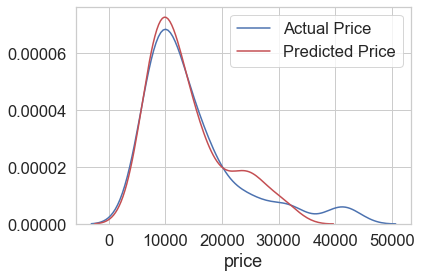

In [161]:
ax_true = sns.distplot(y_test, hist=False, color='b',label='Actual Price');
ax_predicted = sns.distplot(y_hat, hist=False, color='r',label='Predicted Price', ax=ax_true);

In [162]:
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [163]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [164]:
grid_search.best_estimator_.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [165]:
# model.fit(x_train, y_train)

In [166]:
joblib.dump(grid_search.best_estimator_, 'model.pkl')

['model.pkl']

In [167]:
x_data.iloc[50,:].to_numpy()

array([1.00000000e+00, 9.31000000e+01, 1.59100000e+02, 6.42000000e+01,
       1.90000000e+03, 4.00000000e+00, 9.10000000e+01, 3.03000000e+00,
       6.80000000e+01, 7.58064516e+00, 6.18421053e+00])

In [168]:
x_test[0] #.head()#.iloc[0,:]#.to_numpy()

array([-1.        ,  0.85714286,  1.34640523,  0.94117647,  1.19925512,
        2.        ,  2.04597701,  0.70454545,  1.89130435,  1.16590909,
        0.99173554])

- ### Bore: The diameter of the piston, and the inside diameter of the cylinder